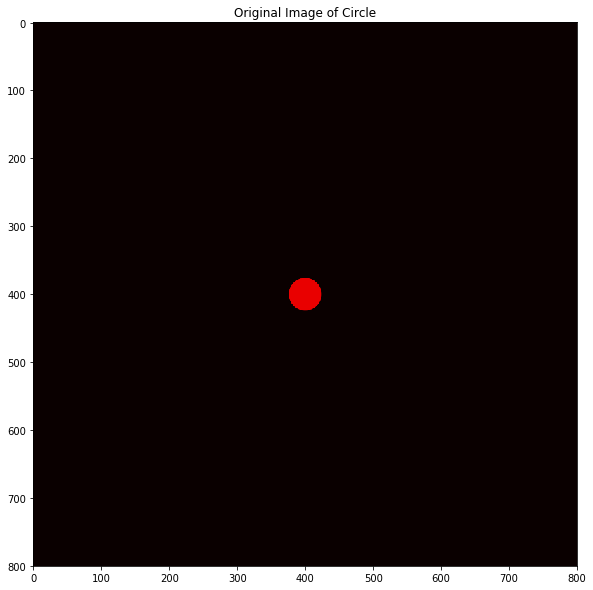

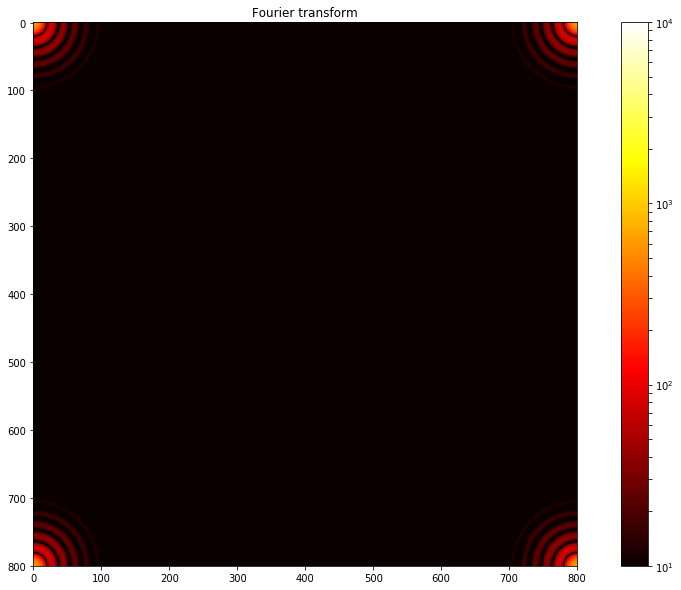

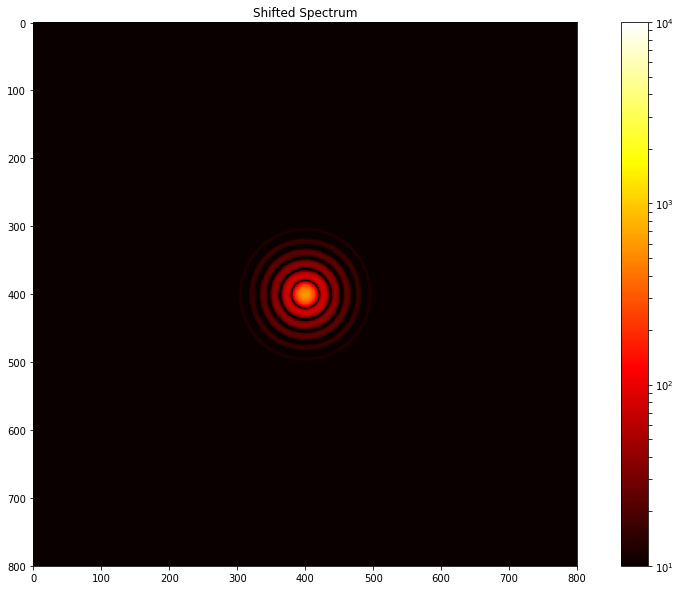

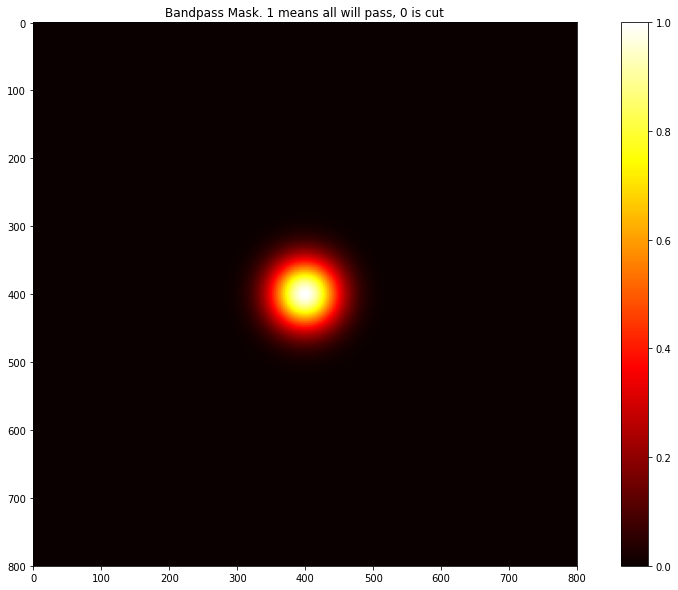

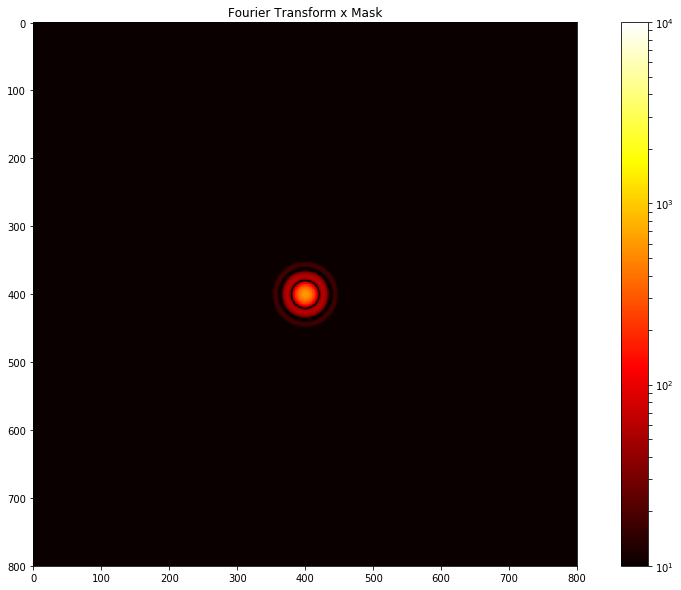

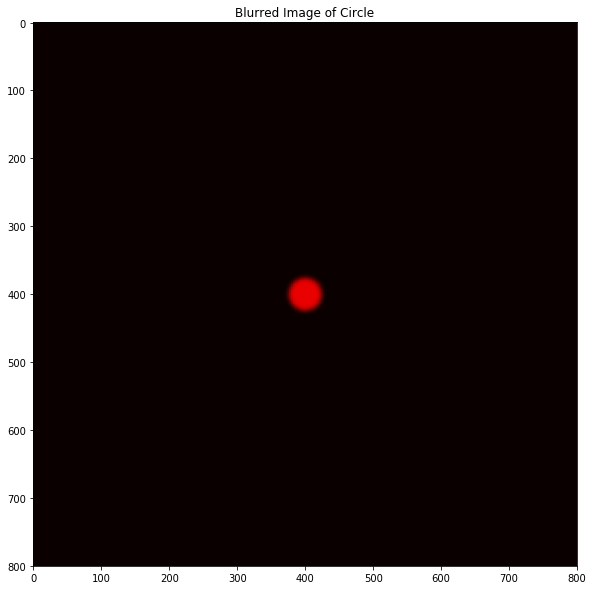

In [2]:
#Library function imports
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import fftpack
from matplotlib.colors import LogNorm


Colour_image = plt.imread('OneCircle.png').astype(float)    #We load in an image here
image = np.mean(Colour_image[0:800,0:800, 0:3], axis=(2,))  #FInd the mean of the arrays
plt.figure(figsize=(16,10))                                 #Set a figure size.
plt.imshow(image, cmap = 'hot', vmin = 0 , vmax = 1)         #Plot our image and set its display limits and its colour map
plt.title('Original Image of Circle')                       #titles graph
plt.show()                                                  #displays graph

# Perform our FFT

image_fft = fftpack.fft2(image)                             #fourrier transform of the image


plt.figure(figsize=(16,10))   
plt.imshow(np.abs(image_fft), cmap = 'hot', norm=LogNorm(vmin=10,vmax=10000))
plt.colorbar()                                              #adds colourbar
plt.title('Fourier transform')                              #titles graph
plt.show()                                                  #displays graph


ftimage = np.fft.fft2(image)                               #this piece of code combines the four corners of the fourier
ftimage = np.fft.fftshift(ftimage)                         #transform to create the image needed for blurring
plt.figure(figsize=(16,10))                                      
plt.imshow(np.abs(ftimage), cmap = 'hot', norm=LogNorm(vmin=10, vmax=10000))#this defines the colourmap and the vmin and vmax
plt.colorbar()                                                              #define what range of values are attributed to
plt.title('Shifted Spectrum')                                               #the colours of the colourmap
plt.show()



#Square Filter Mask
DefineSize = 20;                                                             #this blick of code defines the mask used for blurring
FullSquare = np.ones((800,800))
FullSquare[400-DefineSize:400+DefineSize, 400-DefineSize:400+DefineSize] = 0

# Inverse Square Filter Mask
SquareMask = FullSquare                                                      #this block of code inverts the mask
InvFullSquare = np.zeros((800,800))
InvFullSquare[400-DefineSize:400+DefineSize, 400-DefineSize:400+DefineSize] = 1
InvSquareMask = InvFullSquare

# Gaussian Filter Mask
sigmax, sigmay = 50, 50

nrows, ncols= 800, 800;                     #defines the number of rows and columns for the blurring mask
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

#Invert Mask
OnesArray = np.ones((800,800))
InverseGMask = OnesArray  - gmask;



mask = gmask; # Pick our mask here

# Apply Mask
ftimagep = ftimage  * mask ;
plt.figure(figsize=(16,10))
plt.imshow(np.abs(mask), cmap ='hot', vmin=0.0 , vmax = 1.0)  #defines the oloucrmap of the blurring image
plt.title('Bandpass Mask. 1 means all will pass, 0 is cut')
plt.colorbar()
plt.show()




plt.figure(figsize=(16,10))
plt.imshow(np.abs(ftimagep), cmap = 'hot', norm=LogNorm(vmin=10 , vmax=10000))
plt.title('Fourier Transform x Mask')
plt.colorbar()
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
plt.figure(figsize=(16,10))                        #Set a figure size and the rest of the code plots the blurred image
plt.imshow(np.abs(imagep), cmap = 'hot', vmin = 0 , vmax=1)
plt.title('Blurred Image of Circle')
plt.show()

